In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
%matplotlib inline

#  Laod Data

In [2]:
# Load training data
train_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

In [3]:
len(train_set_x_orig)

209

In [4]:
# Load test data
test_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

In [5]:
len(test_set_x_orig)

50

In [6]:
# Check all the classes
classes = np.array(test_dataset["list_classes"][:])

In [7]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [8]:
# Reshape the train and test set labels
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [9]:
train_set_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
test_set_y

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]])

In [11]:
print(train_set_x_orig.shape)

print(train_set_y_orig.shape)

print(test_set_x_orig.shape)

print(test_set_y_orig.shape)

(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)


#  Visualization

[1]
cat


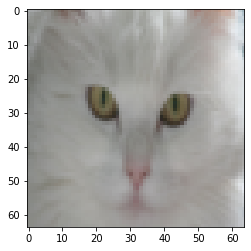

In [12]:
# Example of a picture

index = 50
plt.imshow(train_set_x_orig[index]) # You should see a cat image
y = train_set_y[:, index]
y_class = classes[np.squeeze(train_set_y[:, index])].decode("utf-8")
print(y)
print(y_class)

In [13]:
type(y)

numpy.ndarray

In [14]:
class_names = ['Non Cat', 'Cat']

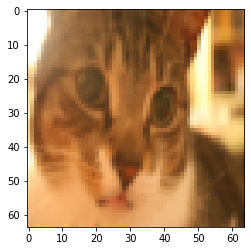

In [15]:
plt.figure()
plt.imshow(np.squeeze(train_set_x_orig[200]))

In [16]:
train_set_y_orig[200]

1

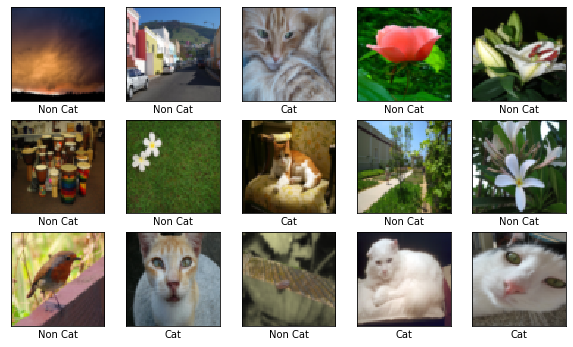

In [17]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_set_x_orig[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_set_y_orig[i]])
plt.show()

The pixel values for the images lie between 0 to 255 now, which is a large range.

Let us normalize these values to a range from 0 to 1. To do this, we can simply divide each pixel value with 255

In [30]:
train_set_x_orig = train_set_x_orig.reshape((209, 64, 64, 3))
test_set_x_orig = test_set_x_orig.reshape((50, 64, 64, 3,))

In [31]:
train_set_x_orig_norm = train_set_x_orig / 255.0
test_set_x_orig_norm = test_set_x_orig / 255.0

Let us now create convolutional layers for our CNN model

In [32]:
from tensorflow.keras import layers, models
conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3,))

In [33]:
conv2 = layers.Conv2D(64, (3,3), activation='relu')

In [34]:
conv3 = layers.Conv2D(128, (3,3), activation='relu')

# Let us create a Max Pooing Layer 

In [35]:
#Creating first Max. Pooling Layer
max_pool_1 = layers.MaxPooling2D((2,2))

#Creating second Max. Pooling Layer
max_pool_2 = layers.MaxPooling2D((2,2))

#Creating third Max. Pooling Layer
max_pool_3 = layers.MaxPooling2D((2,2))

Let us create a Fully Connected Layer (Hidden Layer) and an Output Layer to perform Classification

In [36]:
flat_layer = layers.Flatten()
fc = layers.Dense(128, activation='relu')
output = layers.Dense(10, 'softmax')

Let us now create the model (CNN model) structure using the above defined layers

In [37]:
# TensorFlow Keras uses Keras Sequential API
model = models.Sequential()

model.add(conv1)
model.add(conv2)
model.add(conv3)
model.add(max_pool_1)
model.add(flat_layer)
model.add(fc)
model.add(output)

In [38]:
# Let us see what all layers our model has

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 58, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 107648)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               13779072  
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Let us now specify the optimizer(adam), loss function(crossentropy) and metrics(accuracy) for this model

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Now let us train the model and also perform the cross validation and hyperparameter tuning. Passing validation_split parameter to fit() method ensures that cross validation and hyperparameter tuning also happens during the training.

In [40]:
# we are using the normalized input data

# Let us perform 20 epochs with batch_size as 512, and with shuffling = true 

# shuffle=true will shuffle the indexes of the instances in order to allocate different sets of instances 
# in validation dataset each time cross-validation runs

# validation split=0.1 means a validation dataset of size of 10% is created from the training dataset for cross validation

model.fit(train_set_x_orig_norm, train_set_y_orig, epochs=40, batch_size=512, shuffle=True, validation_split=0.1)

Train on 188 samples, validate on 21 samples
Epoch 1/40
188/188 [==============================] - 2s 12ms/sample - loss: 2.3212 - acc: 0.0160 - val_loss: 1.4307 - val_acc: 0.8095
Epoch 2/40
188/188 [==============================] - 2s 10ms/sample - loss: 2.4508 - acc: 0.6383 - val_loss: 1.8489 - val_acc: 0.1905
Epoch 3/40
188/188 [==============================] - 2s 11ms/sample - loss: 1.4851 - acc: 0.3617 - val_loss: 1.1313 - val_acc: 0.1905
Epoch 4/40
188/188 [==============================] - 2s 11ms/sample - loss: 0.9460 - acc: 0.3617 - val_loss: 0.9054 - val_acc: 0.8095
Epoch 5/40
188/188 [==============================] - 2s 10ms/sample - loss: 0.8735 - acc: 0.6383 - val_loss: 0.6921 - val_acc: 0.8095
Epoch 6/40
188/188 [==============================] - 2s 10ms/sample - loss: 0.8505 - acc: 0.6383 - val_loss: 0.6542 - val_acc: 0.8095
Epoch 7/40
188/188 [==============================] - 2s 10ms/sample - loss: 0.7583 - acc: 0.6383 - val_loss: 0.6180 - val_acc: 0.8095
Epoch 8/40

Let us now make predictions on Test dataset using the above trained model

In [41]:
# we are using the normalized input data
test_loss, test_accuracy = model.evaluate(test_set_x_orig_norm, test_set_y_orig)

50/50 [==============================] - 0s 3ms/sample - loss: 0.8584 - acc: 0.7800


In [42]:
print(test_accuracy)

0.78
